# Mean Shift Clustering
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\anaconda3\envs\machine_learning_assignment\python.exe
Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x00000187081D5190>
Sys paths: ['C:\\Users\\hp\\Documents\\Machine_Learning_Assignment\\testing', 'C:\\Users\\hp\\Documents\\Machine_Learning_Assignment', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\python311.zip', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\DLLs', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment', '', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learn

# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df_scaled = pd.read_csv(r'../raw_data/customer_standard_scaled.csv', index_col = 'CUST_ID')
df_pca = pd.read_csv(r'../raw_data/customer_pca_5.csv', index_col = 'CUST_ID')
df_tsne = pd.read_csv(r'../raw_data/customer_tsne_3.csv', index_col = 'CUST_ID')
df_umap = pd.read_csv(r'../raw_data/customer_umap_3.csv', index_col = 'CUST_ID')

# 1.0 Model Tranining

Four datasets will be experimented with the Mean Shift clustering algorithm:
1. Scaled dataset
2. PCA dataset
3. t-SNE dataset
4. UMAP dataset

In [27]:
# Function to build model
def mean_shift_model_building(df, qt = 0.3):
    # Setting the bandwidth
    est_bandwidth = estimate_bandwidth(df, quantile=qt)
    
    # Creating the Mean Shift model
    ms_model = MeanShift(bandwidth=est_bandwidth).fit(df)

    # Getting the cluster labels and cluster centers
    cluster_labels = ms_model.labels_
    unique_label_num = len(np.unique(cluster_labels))

    return cluster_labels, unique_label_num

# Function to visualise the clusters
def visualise_clusters(df, df_name, cluster_labels):
    # Visualising the clusters
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the 3D scatter plot
    plot = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=cluster_labels, cmap='viridis', s=5)

    plt.colorbar(plot).set_label('Cluster')

    # Adding labels and title
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('3D Mean Shift Clustering: ' + df_name)

    plt.show()

## 1.1 Scaled Dataset

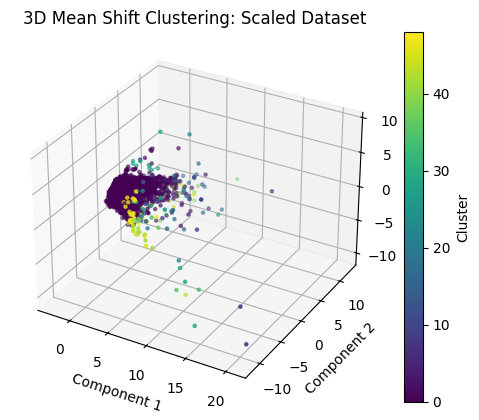

number of clusters : 49


In [28]:
# Build model for scaled dataset
scaled_labels, scaled_unique_labels_num = mean_shift_model_building(df_scaled)

# Visualise the clusters
visualise_clusters(df_pca, 'Scaled Dataset', scaled_labels)

# Printing the number of clusters
print("number of clusters :", scaled_unique_labels_num)

## 1.2 PCA Dataset

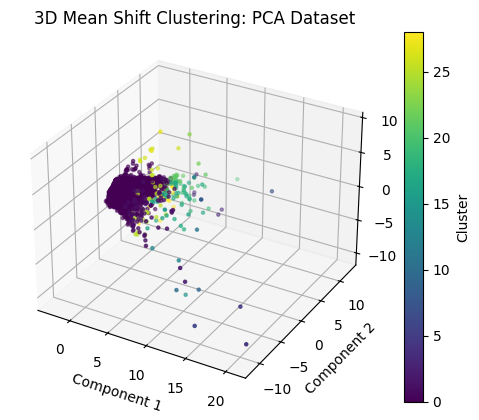

number of clusters : 29


In [29]:
# Build model for PCA dataset
pca_labels, pca_unique_labels_num = mean_shift_model_building(df_pca)

# Visualise the clusters
visualise_clusters(df_pca, 'PCA Dataset', pca_labels)

# Printing the number of clusters
print("number of clusters :", pca_unique_labels_num)

## 1.3 t-SNE Dataset

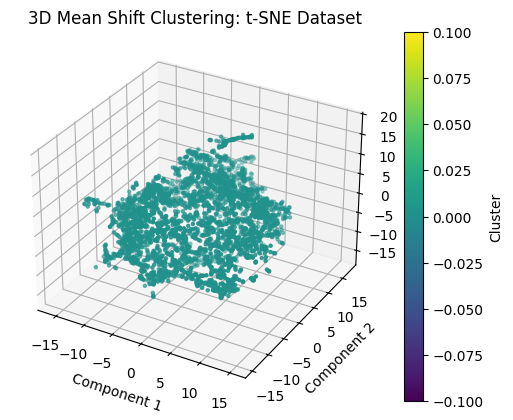

number of clusters : 1


In [30]:
# Build model for t-SNE dataset
tsne_labels, tsne_unique_labels_num = mean_shift_model_building(df_tsne)

# Visualise the clusters
visualise_clusters(df_tsne, 't-SNE Dataset', tsne_labels)

# Printing the number of clusters
print("number of clusters :", tsne_unique_labels_num)

## 1.4 UMAP Dataset

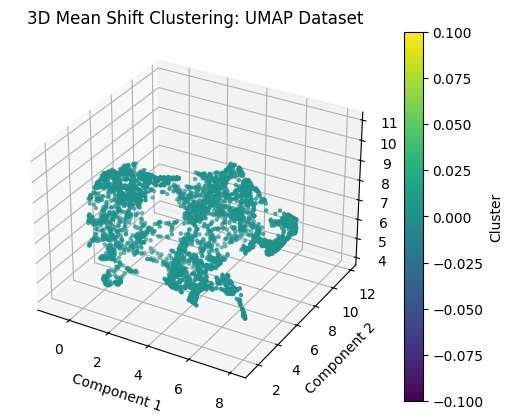

number of clusters : 1


In [31]:
# Build model for UMAP dataset
umap_labels, umap_unique_labels_num = mean_shift_model_building(df_umap)

# Visualise the clusters
visualise_clusters(df_umap, 'UMAP Dataset', umap_labels)

# Printing the number of clusters
print("number of clusters :", tsne_unique_labels_num)

# 2.0 Model Evaluation

Three(3) evaluation metrics will be applied:
1. Silhouette Score
2. Davies-Bouldin Index
3. Calinski-Harabasz Score

References: 
1. https://www.geeksforgeeks.org/clustering-metrics/
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
3. https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a 
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
5. https://www.geeksforgeeks.org/davies-bouldin-index/
6. https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c
7. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
 

## 2.1 Silhouette Score

This metric is measured by calculating the similarity of each data points within the cluster and the dissimilarity of the data points in other clusters.  

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where $a(i)$ is the average distance of point $i$ to all other points in the same cluster and $b(i)$ is the average distance of point $i$ to all other points in the nearest cluster.

__Interpretation__: It ranges from -1 (poor clustering) to +1 (perfect clustering). A score close to 1 suggests well-separated clusters.

Mean Shift Silhouette Score

df_scaled: 0.29266356277373545
df_pca: 0.3497926386563193 

Note: Unable to calculate silhouette score for t-SNE and UMAP datasets because the number of clusters is 1.


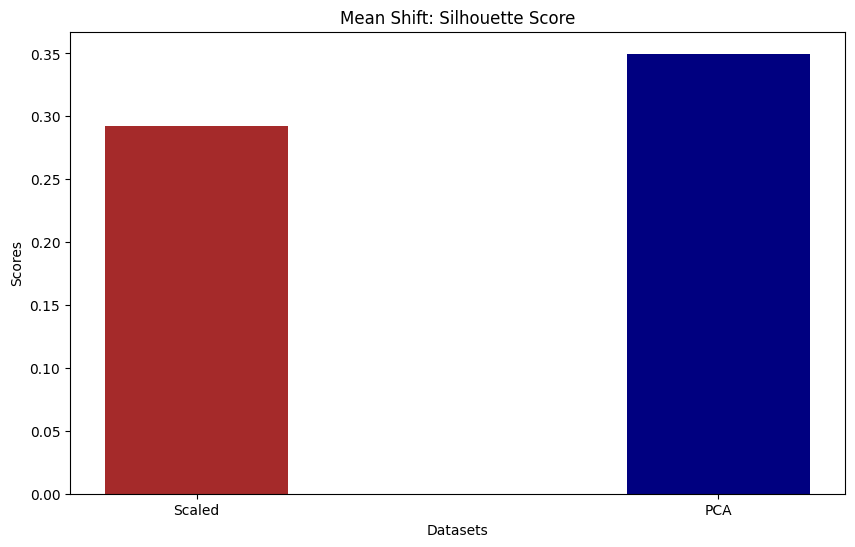

In [8]:
# Calculating the Silhouette Score
silhouette_scaled = silhouette_score(df_scaled, scaled_labels)
silhouette_pca = silhouette_score(df_pca, pca_labels)

# Displaying the Silhouette Score
print("\033[1mMean Shift Silhouette Score\033[0m\n")
print("df_scaled:", silhouette_scaled)
print("df_pca:", silhouette_pca, "\n")
print("Note: Unable to calculate silhouette score for t-SNE and UMAP datasets because the number of clusters is 1.")

# Visualising the differences in Silhouette Score
silhouette_scores = [silhouette_scaled, silhouette_pca]
silhouette_labels = ['Scaled', 'PCA']
plt.figure(figsize=(10, 6))
plt.bar(silhouette_labels, silhouette_scores, width=0.35, label='Silhouette Scores', color=['brown', 'navy'])
plt.xlabel('Datasets')
plt.ylabel('Scores')
plt.title('Mean Shift: Silhouette Score')
plt.show()

## 2.2 Davies-Bouldin Index

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.

$$
DB = \frac{1}{n} \sum_{i=1}^{n} \max_{i \neq j} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)
$$

where $\sigma_i$ is the average distance of all the points in cluster $i$ to the centroid of the cluster, $d_{ij}$ is the distance between the centroids of cluster $i$ and $j$.

__Interpretation__: The minimum value of the Davies-Bouldin index is zero, which indicates the best clustering.

Mean Shift Davies-Bouldin Index

df_scaled: 0.9885308453478383
df_pca: 0.7606913230741157 

Note: Unable to calculate Davies-Bouldin Index for t-SNE and UMAP datasets because the number of clusters is 1.


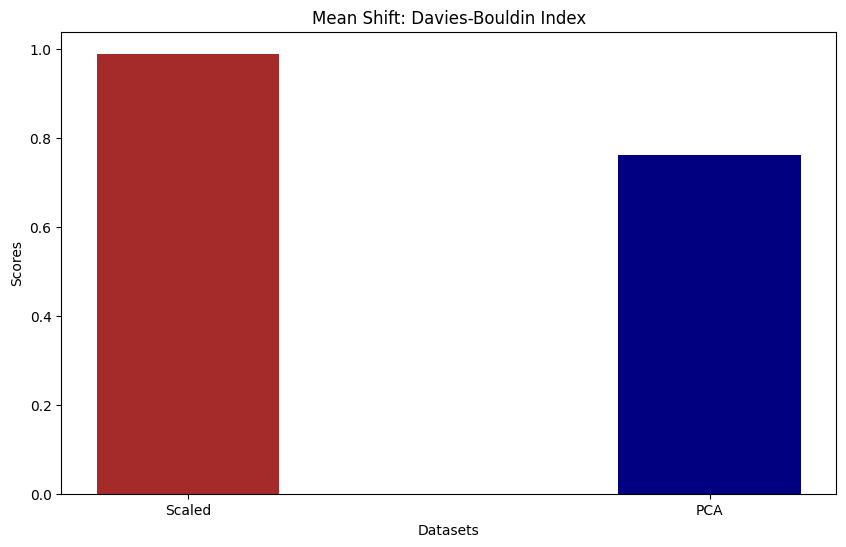

In [9]:
# Calculating the Davies-Bouldin Index
DB_scaled = davies_bouldin_score(df_scaled, scaled_labels)
DB_pca = davies_bouldin_score(df_pca, pca_labels)

# Displaying the Davies-Bouldin Index
print("\033[1mMean Shift Davies-Bouldin Index\033[0m\n")
print("df_scaled:", DB_scaled)
print("df_pca:", DB_pca, "\n")
print("Note: Unable to calculate Davies-Bouldin Index for t-SNE and UMAP datasets because the number of clusters is 1.")

# Visualising the differences in Silhouette Score
DB_scores = [DB_scaled, DB_pca]
DB_labels = ['Scaled', 'PCA']
plt.figure(figsize=(10, 6))
plt.bar(DB_labels, DB_scores, width=0.35, label='Davies-Bouldin Index', color=['brown', 'navy'])
plt.xlabel('Datasets')
plt.ylabel('Scores')
plt.title('Mean Shift: Davies-Bouldin Index')
plt.show()

## 2.3 Calinski-Harabasz Score

The score is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters.

$$
CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

where $B_k$ is the between-cluster dispersion matrix, $W_k$ is the within-cluster dispersion matrix, $n$ is the number of samples, and $k$ is the number of clusters.

__Interpretation__: Higher score indicates better defined clusters.



Mean Shift Calinski-Harabasz Score

df_scaled: 42.03328031934857
df_pca: 71.06236522652132 

Note: Unable to calculate Calinski-Harabasz Score for t-SNE and UMAP datasets because the number of clusters is 1.


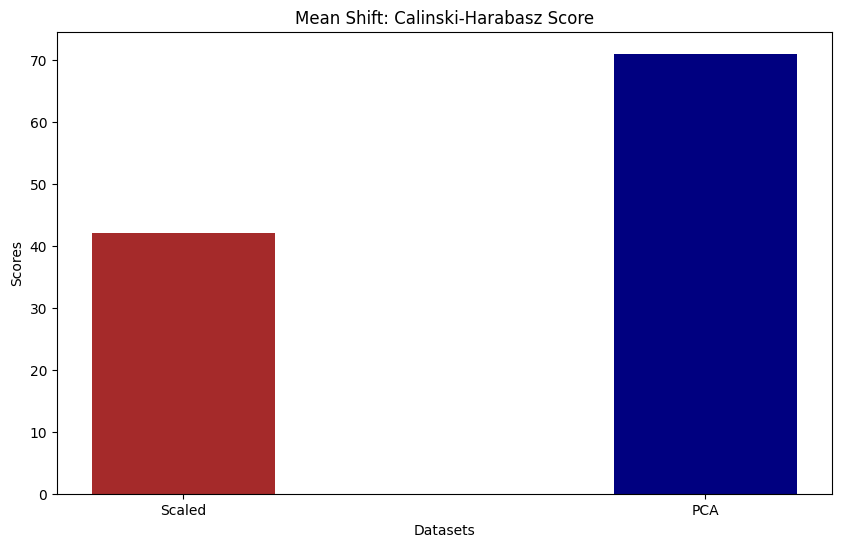

In [10]:
# Calculating the Calinski-Harabasz Score
CH_scaled = calinski_harabasz_score(df_scaled, scaled_labels)
CH_pca = calinski_harabasz_score(df_pca, pca_labels)

# Displaying the Calinski-Harabasz Score
print("\033[1mMean Shift Calinski-Harabasz Score\033[0m\n")
print("df_scaled:", CH_scaled)
print("df_pca:", CH_pca, "\n")
print("Note: Unable to calculate Calinski-Harabasz Score for t-SNE and UMAP datasets because the number of clusters is 1.")

# Visualising the differences in Silhouette Score
CH_scores = [CH_scaled, CH_pca]
CH_labels = ['Scaled', 'PCA']
plt.figure(figsize=(10, 6))
plt.bar(CH_labels, CH_scores, width=0.35, label='Calinski-Harabasz Score', color=['brown', 'navy'])
plt.xlabel('Datasets')
plt.ylabel('Scores')
plt.title('Mean Shift: Calinski-Harabasz Score')
plt.show()

__Summary__: Generally, using PCA dataset for Mean Shift clustering is better than using the scaled dataset. However, the number of clusters is 1 for t-SNE and UMAP datasets, which makes it difficult to evaluate the clustering performance.

# 3.0 Hyperparameter Tuning

The key hyperparameter for Mean Shift clustering is __bandwidth__, which is the radius of the kernel. In sklearn, the default bandwidth is estimated using the estimate_bandwidth function. The estimated bandwidth can be adjusted by setting the __quantile__ parameter, which specifies the proportion of distances to the k-th nearest neighbor that are used to estimate the bandwidth. Higher quantile value will yield a larger bandwidth and vice versa. The default quantile value is 0.3. The following will try out different quantile values to see if it improves the clustering performance.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html

In [11]:
# Quantile values to try
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5]

# Datasets to experiment with
datasets = [df_scaled, df_pca, df_tsne, df_umap]

# Empty lists to store the scores
all_silhouette_scores = []
all_DB_scores = []
all_CH_scores = []

# Loop through the quantile values
for quantile in quantiles:
    # Empty lists to store the scores for each quantile
    silhouettes_per_quantile = []
    DBs_per_quantile = []
    CHs_per_quantile = []
    
    for dataset in datasets:
        # Bandwidth setting
        bandwidth = estimate_bandwidth(dataset, quantile=quantile)
        
        # Creating and fitting the Mean Shift model
        mean_shift = MeanShift(bandwidth=bandwidth).fit(dataset)
        
        # Getting the cluster labels
        labels = mean_shift.labels_
        
        # Check the number of clusters
        unique_label_num = len(np.unique(mean_shift.labels_))
        
        if(unique_label_num == 1):
            silhouette = 0
            DB = 0
            CH = 0
        else:
            # Calculating the Silhouette Score
            silhouette = silhouette_score(dataset, labels)

            # Calculating the Davies-Bouldin Index
            DB = davies_bouldin_score(dataset, labels)

            # Calculating the Calinski-Harabasz Score
            CH = calinski_harabasz_score(dataset, labels)
            
        # Appending the scores
        silhouettes_per_quantile.append(silhouette)
        DBs_per_quantile.append(DB)
        CHs_per_quantile.append(CH)
        
    # Appending the scores for each quantile
    all_silhouette_scores.append(silhouettes_per_quantile)
    all_DB_scores.append(DBs_per_quantile)
    all_CH_scores.append(CHs_per_quantile)

In [12]:
# Copy to preserve the original result
copy_silhouettes = all_silhouette_scores.copy()
copy_dbs = all_DB_scores.copy()
copy_chs = all_CH_scores.copy()

In [13]:
# Prepare list of scores to be converted into DataFrame
for i in range(len(quantiles)):
    # Insert quantile values
    copy_silhouettes[i].insert(0, quantiles[i])
    copy_dbs[i].insert(0, quantiles[i])
    copy_chs[i].insert(0, quantiles[i])
    
# Convert to DataFrame
dataset_names = ['df_scaled', 'df_pca', 'df_tsne', 'df_umap']
columns = ['Quantile', 'Scaled', 'PCA', 't-SNE', 'UMAP']
df_silhouette = pd.DataFrame(copy_silhouettes, columns=columns).set_index('Quantile').T
df_db = pd.DataFrame(copy_dbs, columns=columns).set_index('Quantile').T
df_ch = pd.DataFrame(copy_chs, columns=columns).set_index('Quantile').T

In [36]:
# Function to annotate bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=6)

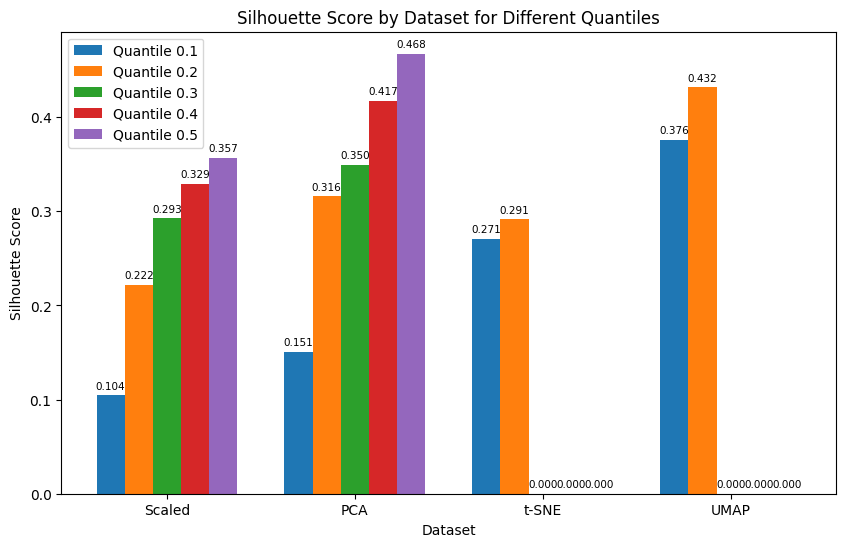

In [15]:
# Visualise the Silhouette Score

# Set positions and width for the bars
x = np.arange(len(df_silhouette.index))  
width = 0.15  

# Create subplots for the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quantile value as a separate set of bars within each group
for i, quantile in enumerate(df_silhouette.columns):
    bar = ax.bar(x + i * width, df_silhouette.iloc[:, i], width, label=f'Quantile {quantile}')
    add_labels(bar)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Dataset')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score by Dataset for Different Quantiles')
ax.set_xticks(x + width * (len(df_silhouette.columns) / 2 - 0.5))
ax.set_xticklabels(df_silhouette.index)
ax.legend()

# Display the plot
plt.show()

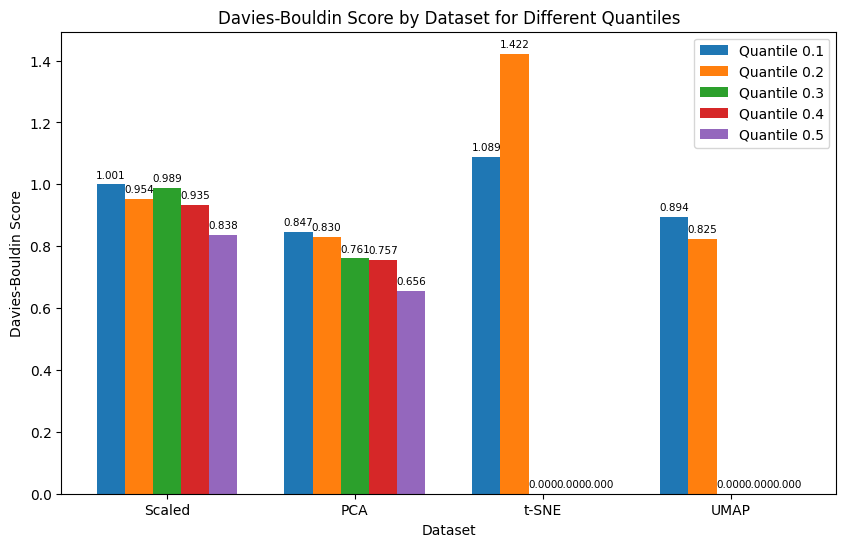

In [16]:
# Visualise the Davies-Bouldin Score

# Set positions and width for the bars
x = np.arange(len(df_db.index))
width = 0.15

# Create subplots for the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quantile value as a separate set of bars within each group
for i, quantile in enumerate(df_db.columns):
    bar = ax.bar(x + i * width, df_db.iloc[:, i], width, label=f'Quantile {quantile}')
    add_labels(bar)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Dataset')
ax.set_ylabel('Davies-Bouldin Score')
ax.set_title('Davies-Bouldin Score by Dataset for Different Quantiles')
ax.set_xticks(x + width * (len(df_db.columns) / 2 - 0.5))
ax.set_xticklabels(df_db.index)
ax.legend()

# Display the plot
plt.show()

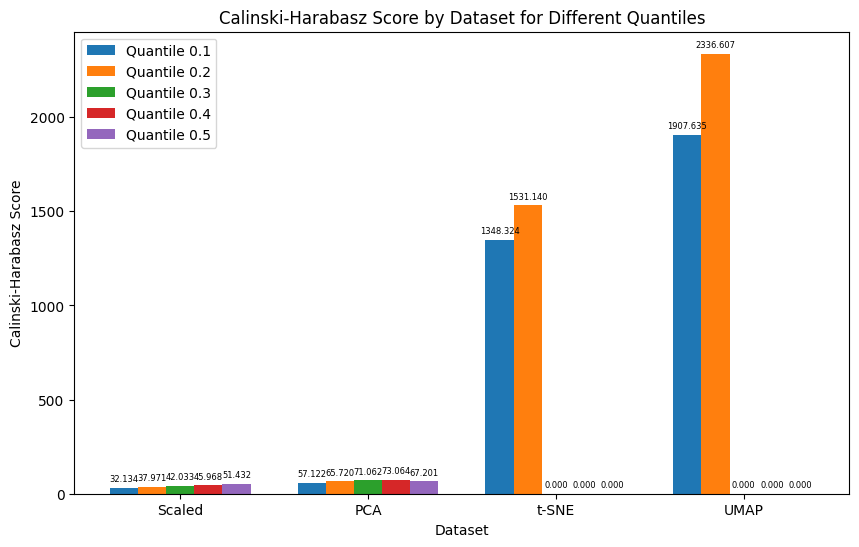

In [37]:
# Visualise the Calinski-Harabasz Score

# Set positions and width for the bars
x = np.arange(len(df_ch.index))
width = 0.15

# Create subplots for the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quantile value as a separate set of bars within each group
for i, quantile in enumerate(df_ch.columns):
    bar = ax.bar(x + i * width, df_ch.iloc[:, i], width, label=f'Quantile {quantile}')
    add_labels(bar)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Dataset')
ax.set_ylabel('Calinski-Harabasz Score')
ax.set_title('Calinski-Harabasz Score by Dataset for Different Quantiles')
ax.set_xticks(x + width * (len(df_ch.columns) / 2 - 0.5))
ax.set_xticklabels(df_ch.index)
ax.legend()

# Display the plot
plt.show()

# 4.0 Conclusion

For each dataset, we will conclude the best quantile value based on the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score.

## 4.1 Scaled Dataset

Based on __Silhouette Score__, the best quantile value is __0.5__ with a score of __0.357__.
Based on __Davies-Bouldin Index__, the best quantile value is __0.5__ with a score of __0.833__.
Based on __Calinski-Harabasz Score__, the best quantile value is __0.5__ with a score of __1.432__.

Hence, the quantile should be set at __0.5__ for the scaled dataset.

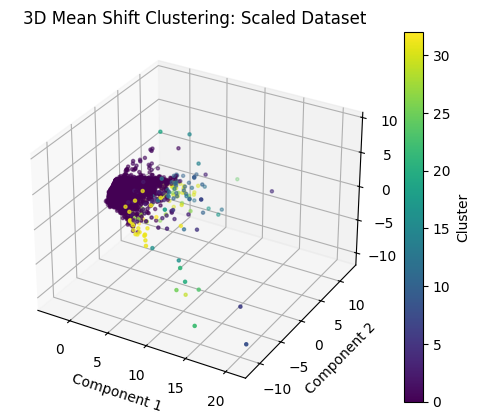

number of clusters : 33


In [33]:
# Build model for Scaled dataset
tuned_scaled_labels, tuned_scaled_unique_labels_num = mean_shift_model_building(df_scaled, 0.5)

# Visualise the clusters
visualise_clusters(df_pca, 'Scaled Dataset', tuned_scaled_labels)

# Printing the number of clusters
print("number of clusters :", tuned_scaled_unique_labels_num)

## 4.2 PCA Dataset

Based on __Silhouette Score__, the best quantile value is __0.5__ with a score of __0.468__.
Based on __Davies-Bouldin Index__, the best quantile value is __0.5__ with a score of __0.656__.
Based on __Calinski-Harabasz Score__, the best quantile value is __0.4__ with a score of __73.064__.

Hence, the quantile should be set at __0.4__ or __0.5__ for the PCA dataset.

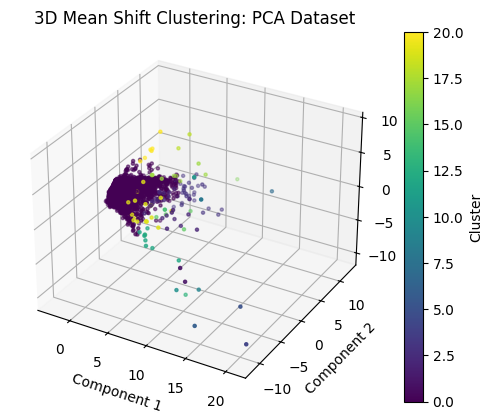

number of clusters : 21
quantile: 0.5


In [45]:
# Build model for PCA dataset
tuned_pca_labels_1, tuned_pca_unique_labels_num_1 = mean_shift_model_building(df_pca, 0.5)

# Visualise the clusters
visualise_clusters(df_pca, 'PCA Dataset', tuned_pca_labels_1)

# Printing the number of clusters
print("number of clusters :", tuned_pca_unique_labels_num_1)
print("quantile: 0.5")

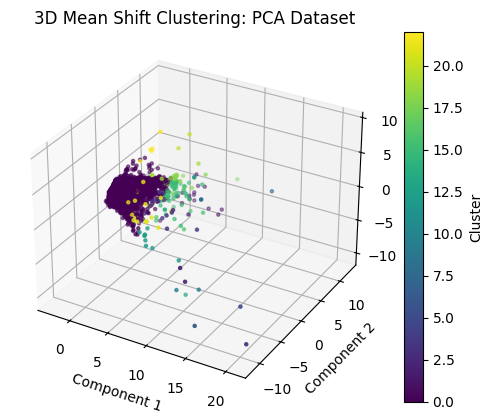

number of clusters : 23
quantile: 0.4


In [46]:
# Build model for PCA dataset
tuned_pca_labels_2, tuned_pca_unique_labels_num_2 = mean_shift_model_building(df_pca, 0.4)

# Visualise the clusters
visualise_clusters(df_pca, 'PCA Dataset', tuned_pca_labels_2)

# Printing the number of clusters
print("number of clusters :", tuned_pca_unique_labels_num_2)
print("quantile: 0.4")

## 4.3 t-SNE Dataset

Based on __Silhouette Score__, the best quantile value is __0.2__ with a score of __0.291__.
Based on __Davies-Bouldin Index__, the best quantile value is __0.1__ with a score of __1.089__.
Based on __Calinski-Harabasz Score__, the best quantile value is __0.2__ with a score of __1531.141__.

Hence, the quantile should be set at __0.1__ or __0.2__ for the t-SNE dataset.


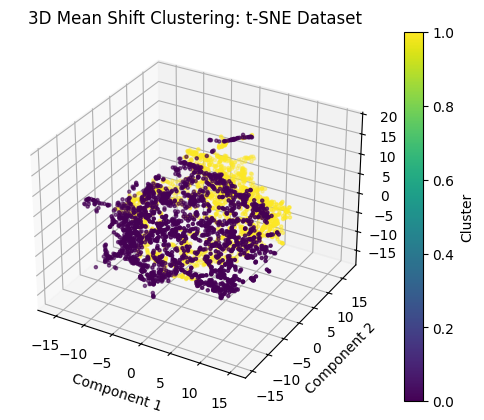

number of clusters : 2
quantile: 0.2


In [43]:
# Build model for t-SNE dataset
tuned_tsne_labels_1, tuned_tsne_unique_labels_num_1 = mean_shift_model_building(df_tsne, 0.2)

# Visualise the clusters
visualise_clusters(df_tsne, 't-SNE Dataset', tuned_tsne_labels_1)

# Printing the number of clusters
print("number of clusters :", tuned_tsne_unique_labels_num_1)
print("quantile: 0.2")

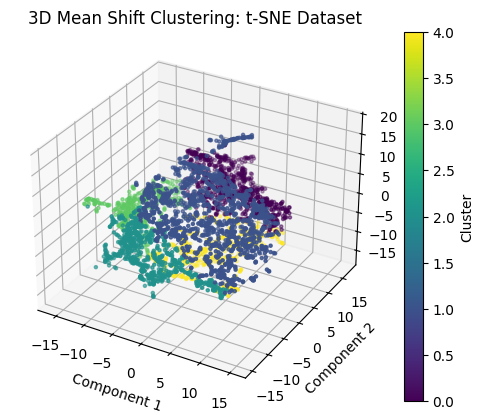

number of clusters : 5
quantile: 0.1


In [44]:
# Build model for t-SNE dataset
tuned_tsne_labels_2, tuned_tsne_unique_labels_num_2 = mean_shift_model_building(df_tsne, 0.1)

# Visualise the clusters
visualise_clusters(df_tsne, 't-SNE Dataset', tuned_tsne_labels_2)

# Printing the number of clusters
print("number of clusters :", tuned_tsne_unique_labels_num_2)
print("quantile: 0.1")

## 4.4 UMAP Dataset

Based on __Silhouette Score__, the best quantile value is __0.2__ with a score of __0.432__.
Based on __Davies-Bouldin Index__, the best quantile value is __0.2__ with a score of __0.825__.
Based on __Calinski-Harabasz Score__, the best quantile value is __0.2__ with a score of __2336.607__.

Hence, the quantile should be set at __0.2__ for the UMAP dataset.

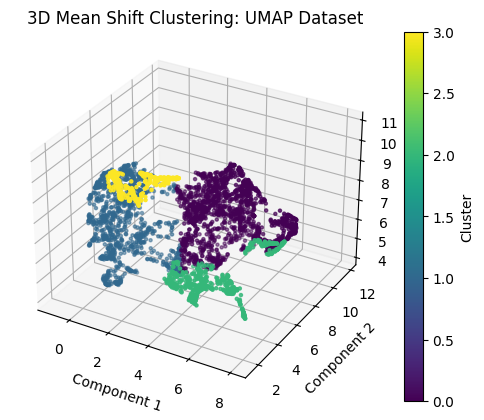

number of clusters : 4


In [42]:
# Build model for UMAP dataset
tuned_umap_labels, tuned_umap_unique_labels = mean_shift_model_building(df_umap, 0.2)

# Visualise the clusters
visualise_clusters(df_umap, 'UMAP Dataset', tuned_umap_labels)

# Printing the number of clusters
print("number of clusters :", tuned_umap_unique_labels)

<u>__Final Conclusion__</u> 

For Mean Shift, __UMAP__ dataset should be used with quantile set at __0.2__. 
This setting yields __4 clusters__.
The __Silhouette Score__ is __0.432__, __Davies-Bouldin Index__ is __0.825__, and __Calinski-Harabasz Score__ is __2336.607__.